# Analysis of team formations in Ligue 1 during the 2015-16 Season

<img src="https://vl-media.fr/wp-content/uploads/2015/07/3200610435_1_27_mBTH8Ied.png" align="center" alt="Drawing" style="width: 500px;"/>



## Introduction

## Dataset

## Table of Contents

* [1. Librairies](#c1)
* [2. DataBase connection](#c2)
* [3. Focus on the Ligue 1](#c3)
* [4. Focus on the 2015-2016 season](#c4)
* [5. List of competition teams](#c5)
* [6. Map of the cities of the competition teams](#c6)
* [7. Focus on the AS Saint-Étienne Team](#c7)

    * [a. Team formation of ASSE](#c7a)
    * [b. Heatmap field of ASSE](#c7b)
    * [c. Team formation occurences of ASSE](#c7c)
    * [d. Characteristics by position of ASSE](#c7d)    
    
        * [1. Weight distribution for each field line](#c7d1)
        * [2. Height distribution for each field line](#c7d2)
        * [3. Prefered foot](#c7d3)
        
* [8. Analysis for all team during the 2015-2016 Ligue 1 season](#c8)

    * [a. Heatmap](#c8a)
    * [b. Team formation occurences](#c8b)
    * [c. Characteristics by position of ASSE](#c8c)
    
        * [1. Height distribution for each field line](#c8c1)
        * [2. Weight distribution for each field line](#c8c2)
        * [3. Prefered foot](#c8c3)


<a class="anchor" id="c7"></a>


## Librairies <a class="anchor" id="c1"></a>

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from math import *
from collections import Counter
from scipy.stats import kde

import warnings
warnings.filterwarnings("ignore")

## DataBase connection <a class="anchor" id="c2"></a>

In [2]:
with sqlite3.connect("database.sqlite") as connect:
    match = pd.read_sql_query("SELECT * from Match", connect)
    country = pd.read_sql_query("SELECT * from Country", connect)
    league = pd.read_sql_query("SELECT * from League", connect)
    team =pd.read_sql_query("SELECT * from Team", connect)
    player =pd.read_sql_query("SELECT * from Player", connect)
    player_attributes=pd.read_sql_query("SELECT * from  Player_Attributes", connect)

## Focus on the Ligue 1 <a class="anchor" id="c3"></a>
We filter the dataset in order to only keep the Ligue 1 data

In [3]:
league_country = league.merge(country, on='id')
fr_league_info = league_country.loc[league_country['name_y'] == 'France']

In [4]:
fr_league_info=fr_league_info.loc[:, fr_league_info.columns != 'country_id']
fr_league_info.columns=["country_id","league","country"]
fr_league_info

,country_id,league,country
2,4769,France Ligue 1,France


In [5]:
match_fr = match.merge(fr_league_info, on='country_id')
match_fr.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league,country
0,4769,4769,4769,2008/2009,1,2008-08-09 00:00:00,483129,8583,9830,2,...,2.9,3.75,2.10,3.00,3.75,2.00,2.88,3.75,France Ligue 1,France
1,4770,4769,4769,2008/2009,1,2008-08-09 00:00:00,483130,9827,7819,2,...,3.3,5.50,1.57,3.60,6.00,1.50,3.50,6.50,France Ligue 1,France
2,4771,4769,4769,2008/2009,1,2008-08-09 00:00:00,483131,9746,9831,1,...,2.9,3.00,2.35,2.90,3.20,2.38,2.88,2.88,France Ligue 1,France
3,4772,4769,4769,2008/2009,1,2008-08-09 00:00:00,483132,8682,8689,0,...,2.9,3.75,2.00,3.10,3.75,1.91,3.00,4.00,France Ligue 1,France
4,4773,4769,4769,2008/2009,1,2008-08-10 00:00:00,483133,9748,9941,3,...,4.0,10.00,1.36,4.25,9.00,1.30,4.33,9.00,France Ligue 1,France


## Focus on the 2015-2016 season <a class="anchor" id="c4"></a>
We filter the dataset in order to only keep the 2015-2016 matches

In [6]:
#focus on 2015-2016 season, last year of the dataset
print("season in the original dataset :",match_fr['season'].unique())
fr_18=match_fr.loc[match_fr['season'] == '2015/2016']
fr_18.head()

season in the original dataset : ['2008/2009' '2009/2010' '2010/2011' '2011/2012' '2012/2013' '2013/2014'
 '2014/2015' '2015/2016']


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league,country
2660,7429,4769,4769,2015/2016,1,2015-08-08 00:00:00,1989778,7794,9851,2,...,3.1,3.10,NaN,NaN,NaN,NaN,NaN,NaN,France Ligue 1,France
2661,7430,4769,4769,2015/2016,1,2015-08-09 00:00:00,1989779,9827,9837,1,...,3.8,5.75,NaN,NaN,NaN,NaN,NaN,NaN,France Ligue 1,France
2662,7431,4769,4769,2015/2016,1,2015-08-07 00:00:00,1989781,8639,9847,0,...,3.8,1.62,NaN,NaN,NaN,NaN,NaN,NaN,France Ligue 1,France
2663,7432,4769,4769,2015/2016,1,2015-08-09 00:00:00,1989782,9748,8689,0,...,4.3,6.50,NaN,NaN,NaN,NaN,NaN,NaN,France Ligue 1,France
2664,7433,4769,4769,2015/2016,1,2015-08-08 00:00:00,1989783,8592,7819,0,...,4.4,6.50,NaN,NaN,NaN,NaN,NaN,NaN,France Ligue 1,France


## List of competition teams <a class="anchor" id="c5"></a>

In [7]:
#Get the list of all team in the 2015-16 Ligue 1 season
team_18=fr_18['home_team_api_id'].unique().tolist()
team_18=team[team['team_api_id'].isin(team_18)]
team_18[["team_api_id","team_long_name","team_short_name"]]

,team_api_id,team_long_name,team_short_name
60,9830,FC Nantes,NAN
61,9827,Girondins de Bordeaux,BOR
62,7819,SM Caen,CAE
64,9831,OGC Nice,NIC
66,8689,FC Lorient,LOR
67,9748,Olympique Lyonnais,LYO
68,9941,Toulouse FC,TOU
69,9829,AS Monaco,MON
70,9847,Paris Saint-Germain,PSG
72,8639,LOSC Lille,LIL


## Map of the cities of the competition teams <a class="anchor" id="c6"></a>

In [8]:
# Make an empty map
m = folium.Map(location=[46.5,4.5], tiles="OpenStreetMap", zoom_start=5)

data = pd.DataFrame({
   'lon':[-1.55, -0.58, -0.37, 7.26,-3.37,4.83,1.44,7.42,2.35,3.06,-1.677,5.37,4.39,3.88,4.03,9.45,4.08,-3.15,-0.56,8.74],
   'lat':[47.2, 44.83, 49.18, 43.7,47.75, 45.76,43.6,43.7,48.86,50.63,48.1,43.3,45.44,43.6,49.258,42.7,48.3,48.55,47.48,41.92],
   'name':team_18["team_long_name"].tolist(),
}, dtype=str)


# add marker one by one on the map
for i in range(0,len(data)):
    folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['name'],
   ).add_to(m)

m

## Focus on the AS Saint-Étienne Team <a class="anchor" id="c7"></a>

In [9]:
#Get all match of AS Saint-Étienne

asse_18_dom=fr_18.loc[fr_18['home_team_api_id'] == 9853]
asse_18_ext=fr_18.loc[fr_18['away_team_api_id'] == 9853]
asse_18=pd.concat([asse_18_dom,asse_18_ext])

### Team formation of ASSE <a class="anchor" id="c7a"></a>

<img src="https://assets.stickpng.com/thumbs/580b57fcd9996e24bc43c4d7.png" align="left" alt="Drawing" style="width:100px;"/>

In [10]:
def Display_compo(df_match,title,nb_match):    

    fig, ax = plt.subplots(nb_match//5+1,5,figsize=(30,(nb_match//5+1)*7))
    #fig.tight_layout()
    for n in range(len(df_match)):
        
        match=df_match.iloc[n]
        
        home_players_api_id = list()
        away_players_api_id = list()
        home_players_x = list()
        away_players_x = list()
        home_players_y = list()
        away_players_y = list()


        for i in range(1,12):
            home_players_api_id.append(match['home_player_%d' % i])
            away_players_api_id.append(match['away_player_%d' % i])
            home_players_x.append(match['home_player_X%d' % i])
            away_players_x.append(match['away_player_X%d' % i])
            home_players_y.append(match['home_player_Y%d' % i])
            away_players_y.append(match['away_player_Y%d' % i])

        #Fetch players'names 
        players_api_id = [home_players_api_id,away_players_api_id]
        players_api_id.append(home_players_api_id) # Home
        players_api_id.append(away_players_api_id) # Away
        players_names = [[None]*11,[None]*11]



        con = sqlite3.connect('database.sqlite')
        con.row_factory = sqlite3.Row
        cur = con.cursor()



        for i in range(2):
            players_api_id_not_none = [x for x in players_api_id[i] if isnan(x)==False]
            request = 'SELECT player_api_id,player_name FROM Player'
            request += ' WHERE player_api_id IN (' + ','.join(map(str, players_api_id_not_none)) + ')'
            cur.execute(request)
            players = cur.fetchall()
            for player in players:
                idx = players_api_id[i].index(player['player_api_id'])
                name = player['player_name'].split()[-1] # keep only the last name
                players_names[i][idx] = name


        home_players_x = [5 if x==1 else x for x in home_players_x]
        away_players_x = [5 if x==1 else x for x in away_players_x]

        away_players_y=[(element-12)/1.7 for element in away_players_y]
        home_players_y=[(-element+12)/1.7 for element in home_players_y]


        img = plt.imread("https://socialcompare.com/u/1809/terrain-football-v_e8675e323e9595f354c655b7acfb43ec.png")        
        ax = ax.flatten()
        
        ax[n].imshow(img, extent=[0, 10, 7, -7])
        ax[n].scatter(home_players_x, home_players_y,s=480,c='blue',alpha=0.8)
        ax[n].scatter(away_players_x, away_players_y,s=480,c='red',alpha=0.8)

        #legend
        for label, x, y in zip(players_names[1], away_players_x, away_players_y):
            ax[n].annotate(
                label, 
                xy = (x, y), xytext = (-15, 12),
                textcoords = 'offset points', va = 'center')
        for label, x, y in zip(players_names[0], home_players_x, home_players_y):
            ax[n].annotate(
                label, 
                xy = (x, y), xytext = (-15, 12),
                textcoords = 'offset points', va = 'center')

        ax[n].axis('off')

    fig.suptitle(title, fontsize=50,y=0.92)


    plt.show()

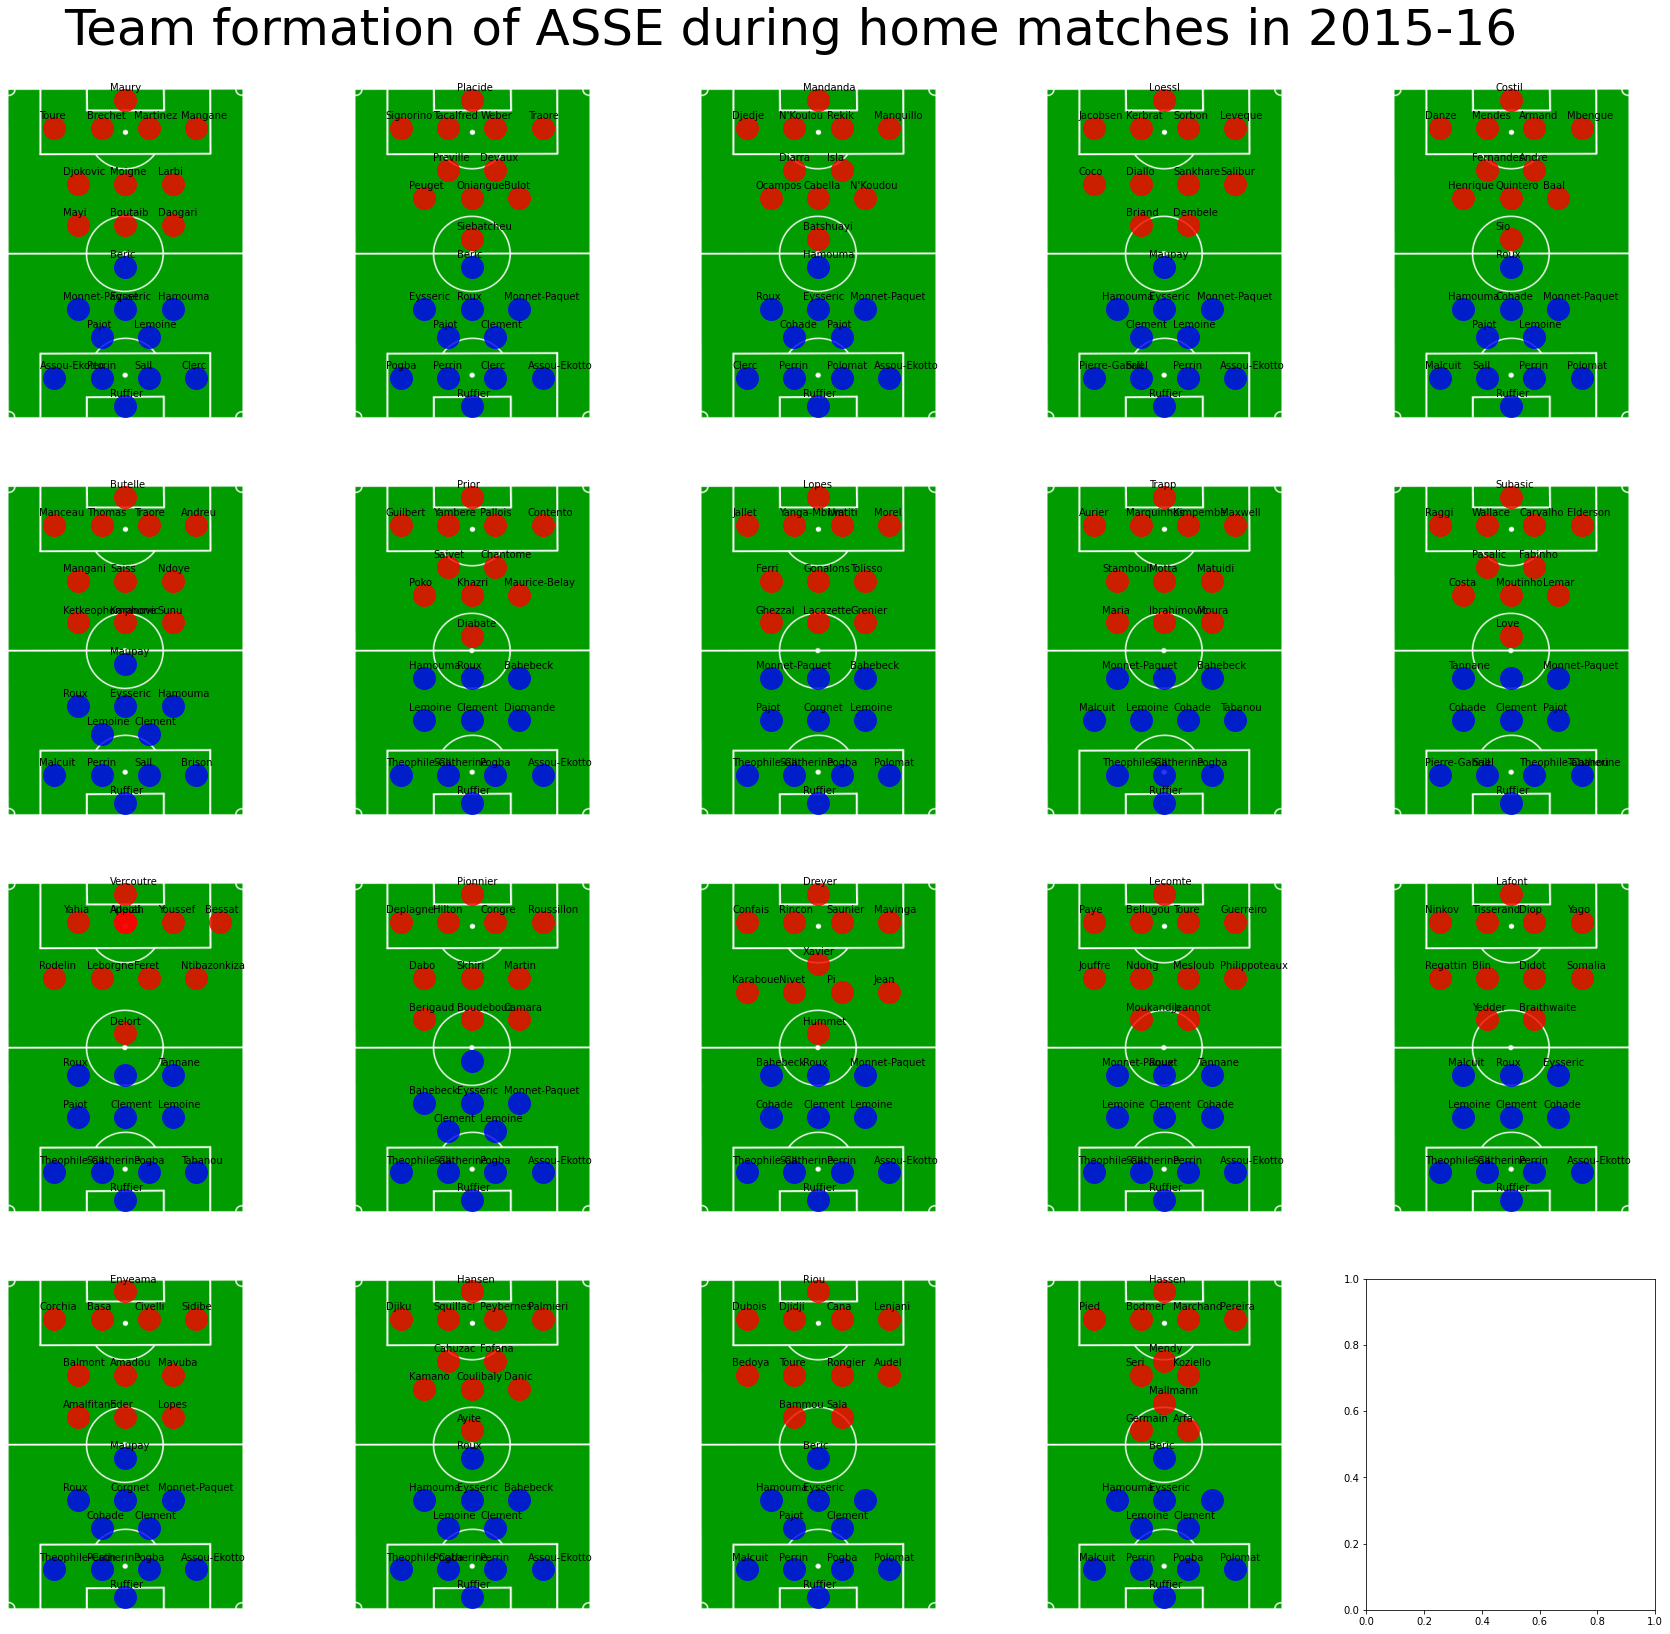

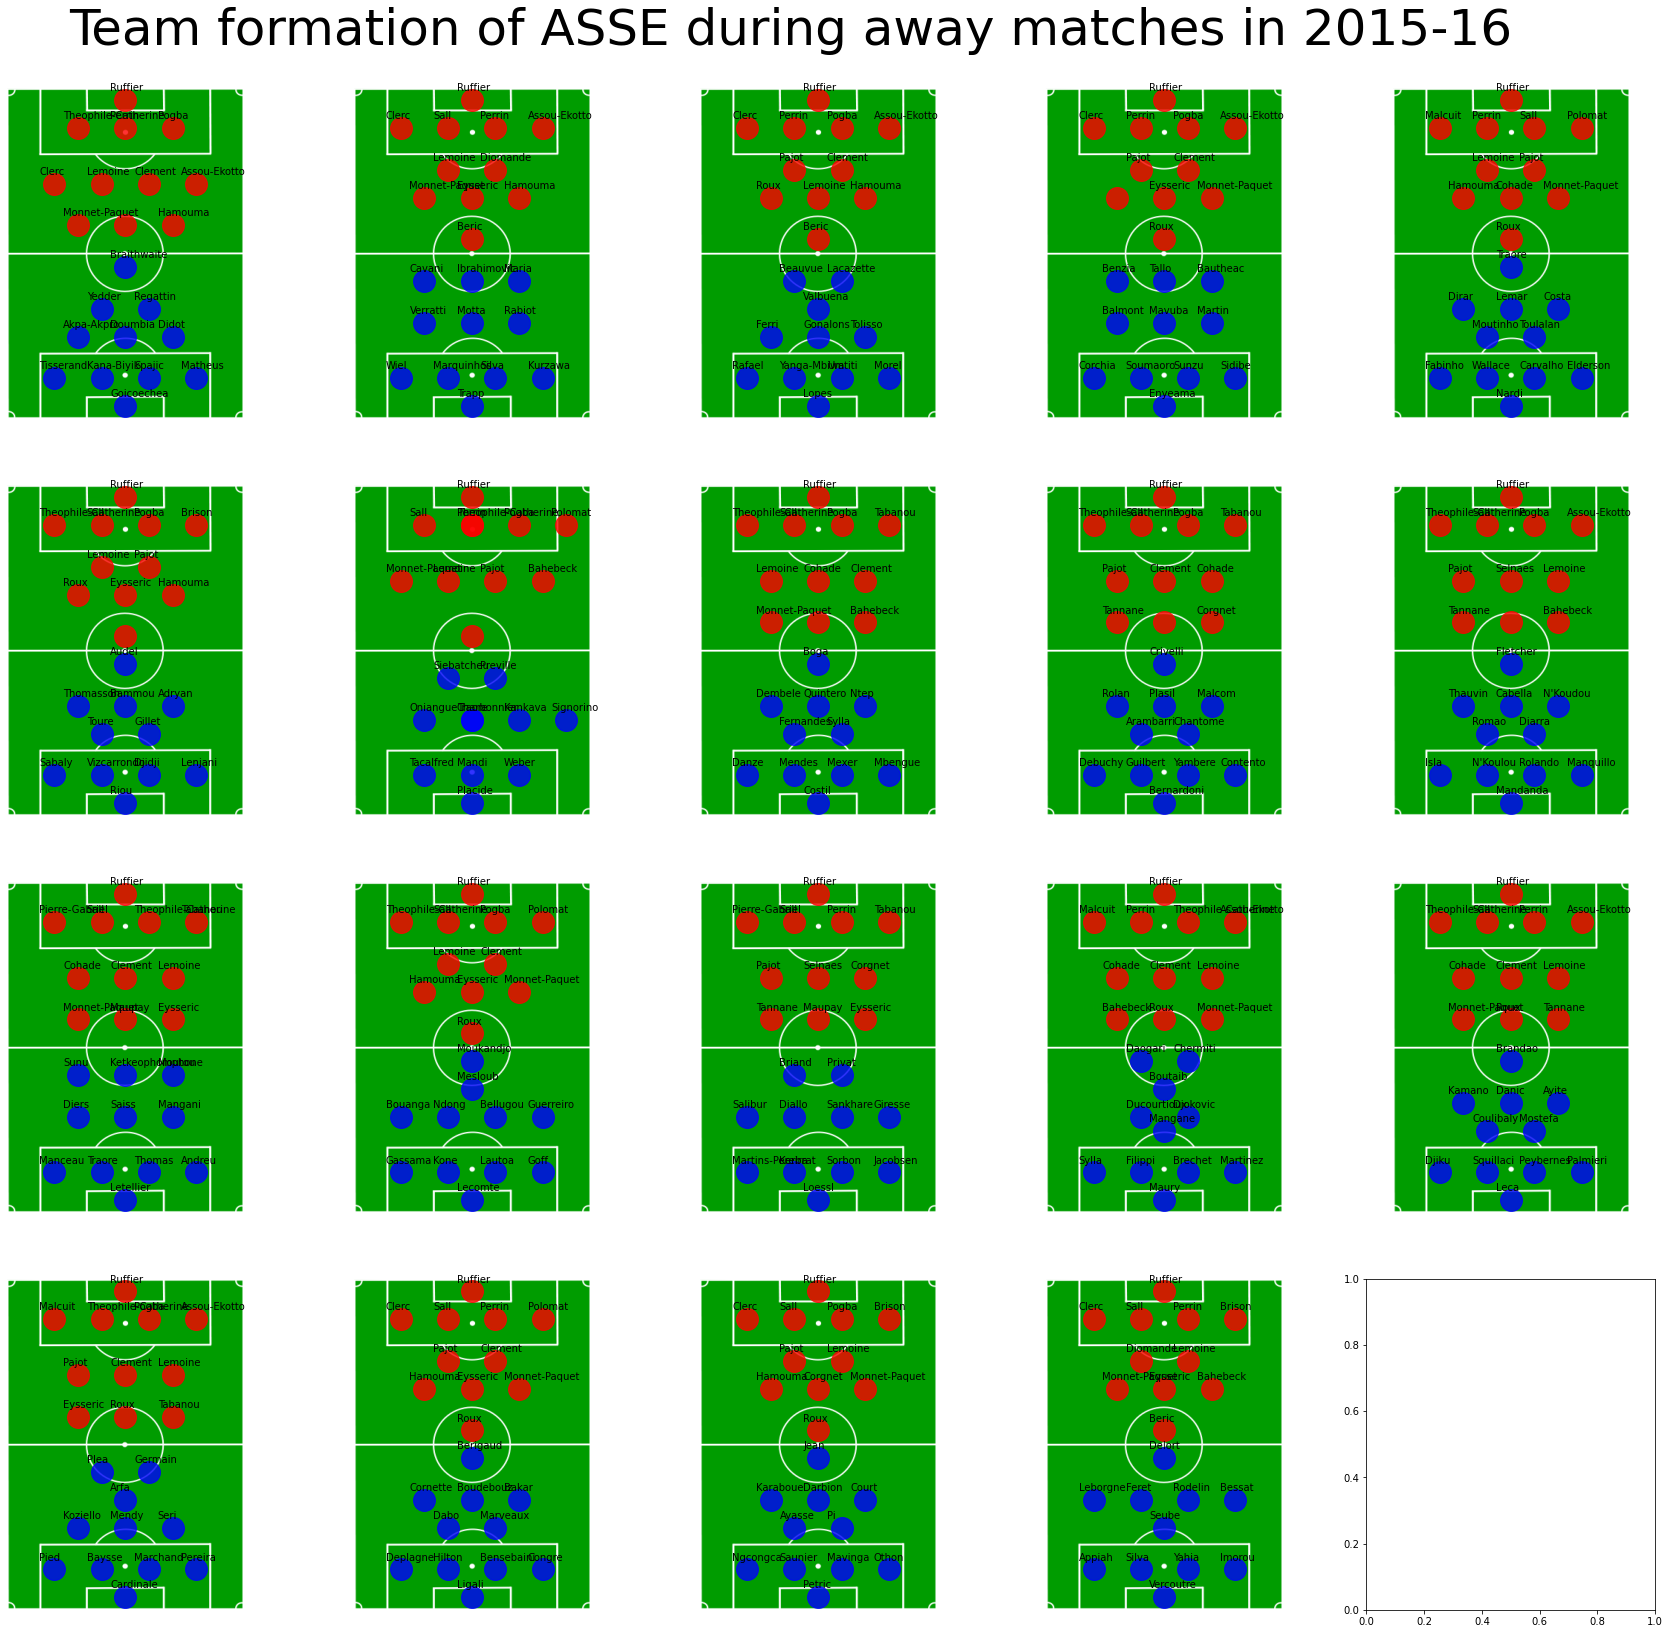

In [11]:
Display_compo(asse_18[:19],'Team formation of ASSE during home matches in 2015-16',19)
Display_compo(asse_18[19:],'Team formation of ASSE during away matches in 2015-16',19)

### Heatmap field of ASSE <a class="anchor" id="c7b"></a>

In [12]:
xa=list()
ya=list()

xh=list()
yh=list()


for i in range(len(asse_18)):
    match=asse_18.iloc[i]
    
    for j in range(1,12):  
            if i<19:
                if match['home_player_X%d' % j]==1:
                    xh.append(5)
                else:
                    xh.append(match['home_player_X%d' % j])
                yh.append(match['home_player_Y%d' % j])
                
            else:
                if match['away_player_X%d' % j]==1:
                    xa.append(5)
                else:
                    xa.append(match['away_player_X%d' % j])
                ya.append(match['away_player_Y%d' % j])

                
data= [list(a) for a in zip(xa,ya)]
data=np.array(data)

dath= [list(a) for a in zip(xh,yh)]
dath=np.array(dath)

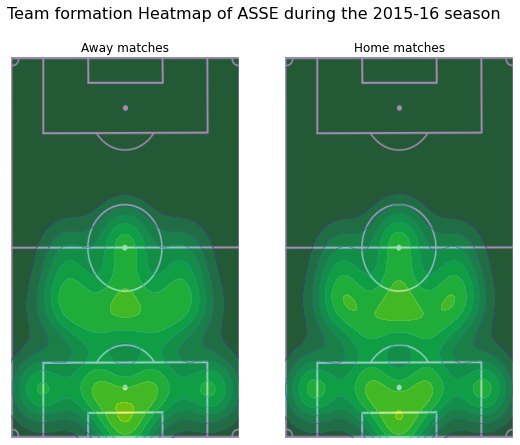

In [13]:


def Heatmap(nbins,title):
    k = kde.gaussian_kde(data.T)
    xi, yi = np.mgrid[1:9:nbins*1j, 0:20:nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))


    kh = kde.gaussian_kde(dath.T)
    xih, yih = np.mgrid[1:9:nbins*1j, 0:20:nbins*1j]
    zih = kh(np.vstack([xih.flatten(), yih.flatten()]))

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9,7))

    ax1.contourf(xi, yi, zi.reshape(xi.shape), alpha=0.5)
    ax2.contourf(xih, yih, zih.reshape(xih.shape), alpha=0.5)

    ax1.set_xlim(1, 9)
    ax1.set_ylim(0.5, 20)

    ax2.set_xlim(1, 9)
    ax2.set_ylim(0.5, 20)

    im = plt.imread('https://socialcompare.com/u/1809/terrain-football-v_e8675e323e9595f354c655b7acfb43ec.png')

    ax1.imshow(im, extent=[1, 9, 0.5, 20], aspect='auto')
    ax2.imshow(im, extent=[1, 9, 0.5, 20], aspect='auto')

    ax1.axis('off')
    ax2.axis('off')


    ax1.set_title('Away matches')
    ax2.set_title('Home matches')

    fig.suptitle(title, fontsize=16)


    plt.show()

nbins = 100
Heatmap(nbins,'Team formation Heatmap of ASSE during the 2015-16 season')

### Team formation occurences of ASSE <a class="anchor" id="c7c"></a>

In [14]:
def Count_compo(df_match):    
    compo_list=list()

    for n in range(len(df_match)):
        
        match=df_match.iloc[n]
        
        home_players_api_id = list()
        away_players_api_id = list()
        home_players_x = list()
        away_players_x = list()
        home_players_y = list()
        away_players_y = list()

        for i in range(1,12):
            home_players_api_id.append(match['home_player_%d' % i])
            away_players_api_id.append(match['away_player_%d' % i])
            home_players_x.append(match['home_player_X%d' % i])
            away_players_x.append(match['away_player_X%d' % i])
            home_players_y.append(match['home_player_Y%d' % i])
            away_players_y.append(match['away_player_Y%d' % i])

        #Fetch players'names 
        players_api_id = [home_players_api_id,away_players_api_id]
        players_api_id.append(home_players_api_id) # Home
        players_api_id.append(away_players_api_id) # Away
        players_names = [[None]*11,[None]*11]

        con = sqlite3.connect('database.sqlite')
        con.row_factory = sqlite3.Row
        cur = con.cursor()

        for i in range(2):
            players_api_id_not_none = [x for x in players_api_id[i] if isnan(x)==False]
            request = 'SELECT player_api_id,player_name FROM Player'
            request += ' WHERE player_api_id IN (' + ','.join(map(str, players_api_id_not_none)) + ')'
            cur.execute(request)
            players = cur.fetchall()
            for player in players:
                idx = players_api_id[i].index(player['player_api_id'])
                name = player['player_name'].split()[-1] # keep only the last name
                players_names[i][idx] = name


        home_players_x = [5 if x==1 else x for x in home_players_x]
        away_players_x = [5 if x==1 else x for x in away_players_x]

        away_players_y=[(element-12)/1.7 for element in away_players_y]
        home_players_y=[(-element+12)/1.7 for element in home_players_y]
    
    
        players_y = [home_players_y,away_players_y]
        formations = [None] * 2
        for i in range(2):
                
            formation_dict=Counter(players_y[i]);
            if i==0:
                sorted_keys = sorted(formation_dict,reverse=True)
            else:
                sorted_keys = sorted(formation_dict) 

            formation = ''
            for key in sorted_keys[1:-1]:
                y = formation_dict[key]
                formation += '%d-' % y
            formation += '%d' % formation_dict[sorted_keys[-1]]   
            formations[i] = formation


        compo_list.append(formations[0])
        compo_list.append(formations[1])

        #print('Home team formation: ' + formations[0])
        #print('Away team formation: ' + formations[1])
    return compo_list


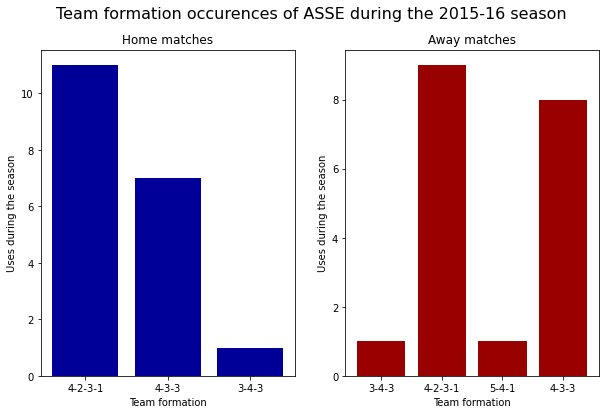

In [15]:
asse_compo=Count_compo(asse_18)   
asse_h_compo=asse_compo[:38:2]
asse_a_compo=asse_compo[39::2]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))

ax1.bar(Counter(asse_h_compo).keys(), Counter(asse_h_compo).values(), color=(0,0,0.6))
ax2.bar(Counter(asse_a_compo).keys(), Counter(asse_a_compo).values(), color=(0.6,0,0))

ax1.set_ylabel('Uses during the season')
ax1.set_xlabel('Team formation')
ax1.set_title('Home matches')

ax2.set_ylabel('Uses during the season')
ax2.set_xlabel('Team formation')
ax2.set_title('Away matches')

fig.suptitle('Team formation occurences of ASSE during the 2015-16 season', fontsize=16)

plt.show()

### Characteristics by position of ASSE <a class="anchor" id="c7d"></a>

#### Weight distribution for each field line <a class="anchor" id="c7d1"></a>

In [16]:
def player_compo(df_match,lim):    

    compo_list=list()
    players_api_id = list()
    players_x = list()
    players_y = list()
    
    for n in range(len(df_match)):
        match=df_match.iloc[n]
        
        for i in range(1,12):
            if lim==True:
                if n<19:
                    players_api_id.append(match['home_player_%d' % i])
                    players_x.append(match['home_player_X%d' % i])
                    players_y.append(match['home_player_Y%d' % i])

                else:
                    players_api_id.append(match['away_player_%d' % i])
                    players_x.append(match['away_player_X%d' % i])
                    players_y.append(match['away_player_Y%d' % i])
            else:
                    players_api_id.append(match['home_player_%d' % i])
                    players_x.append(match['home_player_X%d' % i])
                    players_y.append(match['home_player_Y%d' % i])
                    players_api_id.append(match['away_player_%d' % i])
                    players_x.append(match['away_player_X%d' % i])
                    players_y.append(match['away_player_Y%d' % i])

        players_x = [5 if x==1 else x for x in players_x]
    return (players_api_id,players_x,players_y)

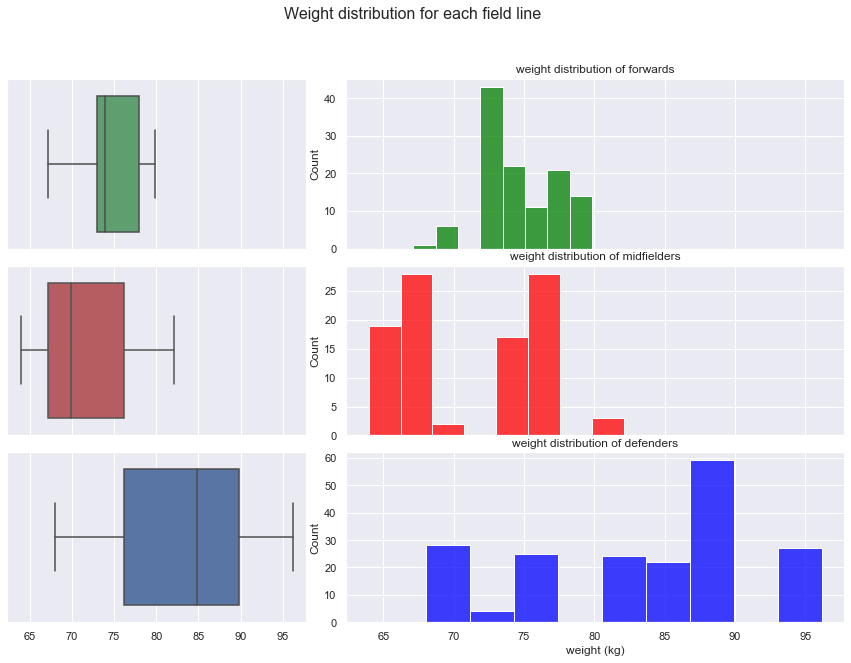

In [17]:
lists=player_compo(asse_18,True)

def Weight(lists):
    df = pd.DataFrame(list(zip(lists[0], lists[1],lists[2])),
                   columns =['player_api_id', 'players_x','players_y'])

    df = df.join(player.set_index('player_api_id'), on='player_api_id')
    df['weight']=df['weight'].apply(lambda x: x*0.453592)

    #forwards
    df_a=df.loc[df['players_y'] >= 7.2]
    #midfielders
    df_m=df.loc[(df['players_y'] >= 3.6) & (df['players_y'] < 7.2) ]
    #defenders
    df_d=df.loc[df['players_y'] < 3.6]

    sns.set(style="darkgrid")

    f, ax = plt.subplots(3, 2, figsize=(15, 10), sharex=True,gridspec_kw={'width_ratios': [3,5],
                           'wspace': 0.1,
                           'hspace': 0.1})

    sns.boxplot(df_a["weight"], ax=ax[0][0],palette=['g'])
    sns.histplot(data=df_a, x="weight", ax=ax[0][1],color='green').set(title='weight distribution of forwards',xlabel='weight (kg)')
    ax[0][0].set(xlabel='')


    # assigning a graph to each ax
    sns.boxplot(df_m["weight"], ax=ax[1][0],palette=['r'])
    sns.histplot(data=df_m, x="weight", ax=ax[1][1], color='red').set(title='weight distribution of midfielders',xlabel='weight (kg)')
    ax[1][0].set(xlabel='')

    sns.boxplot(df_d["weight"], ax=ax[2][0],palette=['b'])
    sns.histplot(data=df_d, x="weight", ax=ax[2][1],color='blue').set(title='weight distribution of defenders',xlabel='weight (kg)')
    ax[2][0].set(xlabel='')

    f.suptitle('Weight distribution for each field line', fontsize=16)

Weight(lists)

#### Height distribution for each field line <a class="anchor" id="c7d2"></a>

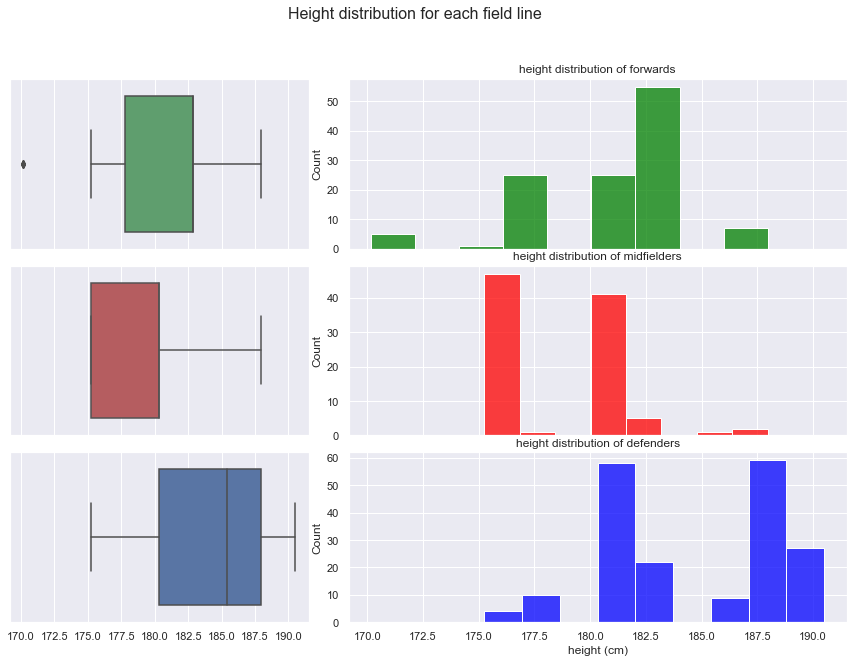

In [18]:
def Height(lists):
    df = pd.DataFrame(list(zip(lists[0], lists[1],lists[2])),
                   columns =['player_api_id', 'players_x','players_y'])

    df = df.join(player.set_index('player_api_id'), on='player_api_id')


    #forwards
    df_a=df.loc[df['players_y'] >= 7.2]
    #midfielders
    df_m=df.loc[(df['players_y'] >= 3.6) & (df['players_y'] < 7.2) ]
    #defenders
    df_d=df.loc[df['players_y'] < 3.6]



    sns.set(style="darkgrid")

    f, ax = plt.subplots(3, 2, figsize=(15, 10), sharex=True,gridspec_kw={'width_ratios': [3,5],
                           'wspace': 0.1,
                           'hspace': 0.1})

    sns.boxplot(df_a["height"], ax=ax[0][0],palette=['g'])
    sns.histplot(data=df_a, x="height", ax=ax[0][1],color='green').set(title='height distribution of forwards',xlabel='height (cm)')

    ax[0][0].set(xlabel='')



    sns.boxplot(df_m["height"], ax=ax[1][0],palette=['r'])
    sns.histplot(data=df_m, x="height", ax=ax[1][1], color='red').set(title='height distribution of midfielders',xlabel='height (cm)')

    ax[1][0].set(xlabel='')


    sns.boxplot(df_d["height"], ax=ax[2][0],palette=['b'])
    sns.histplot(data=df_d, x="height", ax=ax[2][1],color='blue').set(title='height distribution of defenders',xlabel='height (cm)')

    ax[2][0].set(xlabel='')

    f.suptitle('Height distribution for each field line', fontsize=16)

Height(lists)

#### Prefered foot <a class="anchor" id="c7d3"></a>

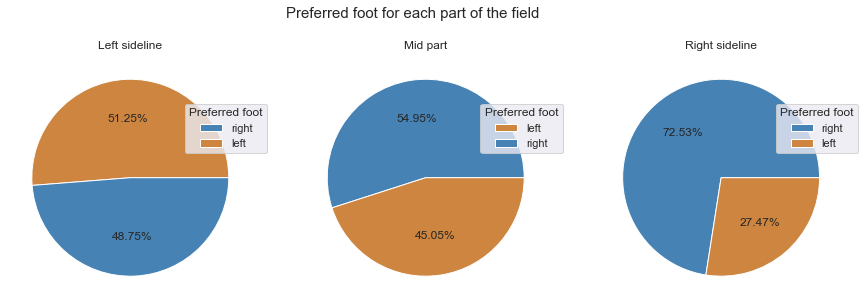

In [19]:
def Feet(lists):

    df = pd.DataFrame(list(zip(lists[0], lists[1],lists[2])),
                   columns =['player_api_id', 'players_x','players_y'])
    df = df.join(player.set_index('player_api_id'), on='player_api_id')
    df = df.join(player_attributes, on='player_api_id', how='left', lsuffix='_left', rsuffix='_right')


    #forwards
    df_l=df.loc[df['players_x'] < 5]
    #midfielders
    df_m=df.loc[df['players_x'] == 5 ]
    #defenders
    df_r=df.loc[df['players_x'] > 5]


    fig, ax = plt.subplots(1,3,figsize=(15,12)) 


    wedges, texts, autotexts =ax[0].pie(df_m['preferred_foot'].value_counts(), 
                                labeldistance=1.15, 
                                wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
                                autopct='%1.2f%%',
                                colors = ['peru', 'steelblue'])

    ax[1].legend(wedges, ["left","right"],
              title="Preferred foot",
              loc="center left",
              bbox_to_anchor=(0.7, 0.4, 0.5, 0.6))
    ax[1].set_title("Mid part")

    wedges, texts, autotexts =ax[1].pie(df_l['preferred_foot'].value_counts(), 
                                labeldistance=1.15, 
                                wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
                                autopct='%1.2f%%',
                                colors = ['steelblue','peru'])

    ax[0].legend(wedges, ["right","left"],
              title="Preferred foot",
              loc="center left",
              bbox_to_anchor=(0.7, 0.4, 0.5, 0.6))
    ax[0].set_title("Left sideline")


    wedges, texts, autotexts =ax[2].pie(df_r['preferred_foot'].value_counts(), 
                                labeldistance=1.15, 
                                wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
                                autopct='%1.2f%%',
                                colors = [ 'steelblue','peru'])

    ax[2].legend(wedges, ["right","left"],
              title="Preferred foot",
              loc="center left",
              bbox_to_anchor=(0.7, 0.4, 0.5, 0.6))
    ax[2].set_title("Right sideline")

    fig.suptitle('Preferred foot for each part of the field', fontsize=15,y=0.7)

Feet(lists)



## Analysis for all team during the 2015-2016 Ligue 1 season <a class="anchor" id="c8"></a>

In [20]:
fr_18.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league,country
2660,7429,4769,4769,2015/2016,1,2015-08-08 00:00:00,1989778,7794,9851,2,...,3.1,3.10,NaN,NaN,NaN,NaN,NaN,NaN,France Ligue 1,France
2661,7430,4769,4769,2015/2016,1,2015-08-09 00:00:00,1989779,9827,9837,1,...,3.8,5.75,NaN,NaN,NaN,NaN,NaN,NaN,France Ligue 1,France
2662,7431,4769,4769,2015/2016,1,2015-08-07 00:00:00,1989781,8639,9847,0,...,3.8,1.62,NaN,NaN,NaN,NaN,NaN,NaN,France Ligue 1,France
2663,7432,4769,4769,2015/2016,1,2015-08-09 00:00:00,1989782,9748,8689,0,...,4.3,6.50,NaN,NaN,NaN,NaN,NaN,NaN,France Ligue 1,France
2664,7433,4769,4769,2015/2016,1,2015-08-08 00:00:00,1989783,8592,7819,0,...,4.4,6.50,NaN,NaN,NaN,NaN,NaN,NaN,France Ligue 1,France


### Heatmap <a class="anchor" id="c8a"></a>

In [21]:
xa=list()
ya=list()

xh=list()
yh=list()


for i in range(len(fr_18)):
    match=fr_18.iloc[i]
    
    for j in range(1,12):  
                if match['home_player_X%d' % j]==1:
                    xh.append(5)
                elif match['away_player_X%d' % j]==1:
                    xa.append(5)
                else:
                    xh.append(match['home_player_X%d' % j])
                    yh.append(match['home_player_Y%d' % j])
                    xa.append(match['away_player_X%d' % j])
                    ya.append(match['away_player_Y%d' % j])

                
data= [list(a) for a in zip(xa,ya)]
data=np.array(data)

dath= [list(a) for a in zip(xh,yh)]
dath=np.array(dath)

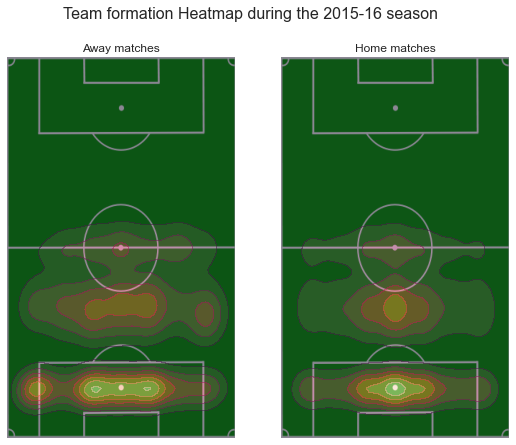

In [22]:
nbins = 100
Heatmap(nbins,'Team formation Heatmap during the 2015-16 season')

### Team formation occurences <a class="anchor" id="c8b"></a>

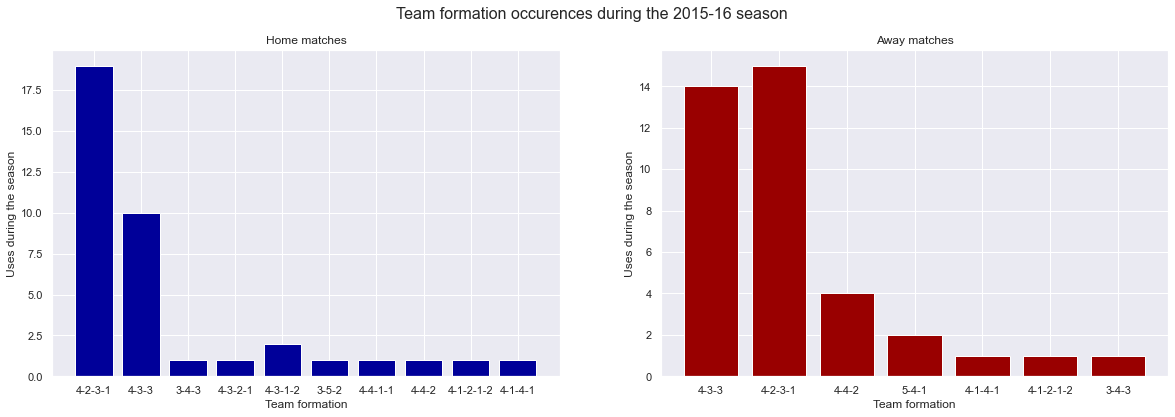

In [23]:
compo=Count_compo(asse_18)   
h=compo[::2]
a=compo[1::2]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,6))

ax1.bar(Counter(h).keys(), Counter(h).values(), color=(0,0,0.6))
ax2.bar(Counter(a).keys(), Counter(a).values(), color=(0.6,0,0))

ax1.set_ylabel('Uses during the season')
ax1.set_xlabel('Team formation')
ax1.set_title('Home matches')

ax2.set_ylabel('Uses during the season')
ax2.set_xlabel('Team formation')
ax2.set_title('Away matches')

fig.suptitle('Team formation occurences during the 2015-16 season', fontsize=16)

plt.show()

### Characteristics by position <a class="anchor" id="c8c"></a>

#### Height distribution for each field line <a class="anchor" id="c8c1"></a>

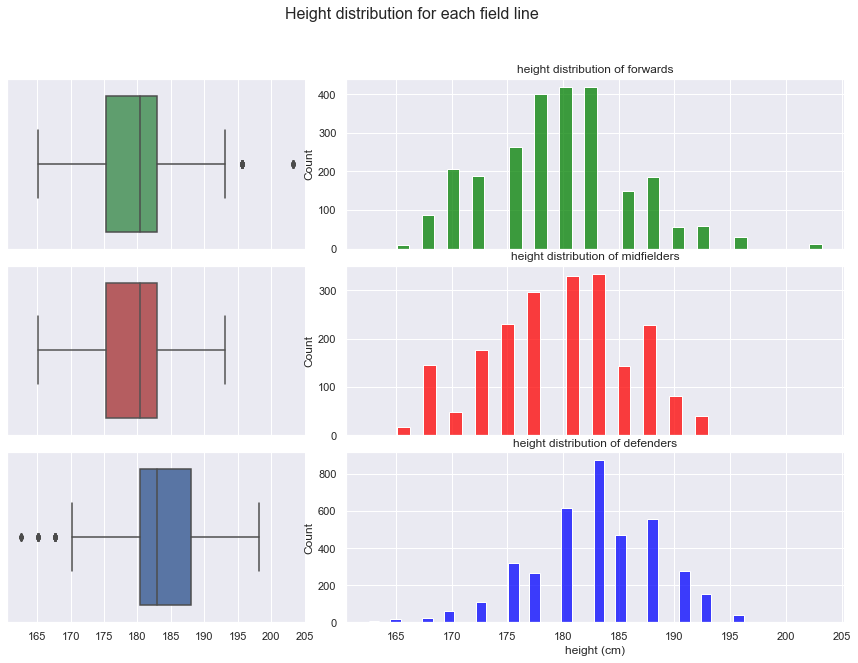

In [24]:
lists=player_compo(fr_18,False)
Height(lists)

#### Weight distribution for each field line <a class="anchor" id="c8c2"></a>

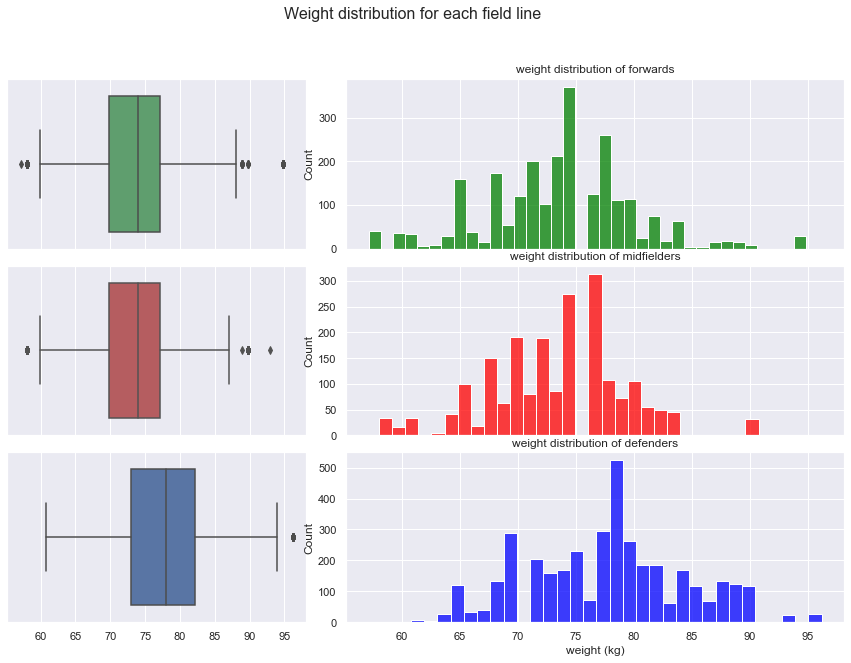

In [25]:
Weight(lists)

#### Prefered foot <a class="anchor" id="c8c3"></a>

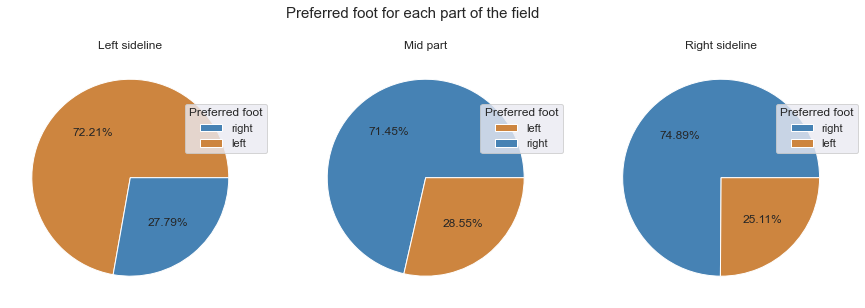

In [26]:
Feet(lists)